In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns

# Code for Fig 4.
- graph_norm.csv and gea.csv are from [preprocess_fig4.ipynb](https://github.com/inoue0426/drGAT/blob/main/Figs/preprocess_fig4.ipynb)
- pubchem.csv is from [Fig2.ipynb](https://github.com/inoue0426/drGAT/blob/main/Figs/Fig2.ipynb)
- pubchem.csv is from [Fig2.ipynb](https://github.com/inoue0426/drGAT/blob/main/Figs/Fig2.ipynb)

In [2]:
df = pd.read_csv("graph_norm.csv", index_col=0)
pubchem = pd.read_csv("pubchem.csv", index_col=0)
gea = pd.read_csv("gea.csv", index_col=0)

/var/folders/s4/6xgylm7x3yzgfsk6sbvk_7_c0000gn/T/ipykernel_96701/851024714.py:67: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap(cmap_name)
/var/folders/s4/6xgylm7x3yzgfsk6sbvk_7_c0000gn/T/ipykernel_96701/851024714.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="drug", y="Term", data=gea.assign(color=colors), palette=colors, dodge=False, ax=ax2)


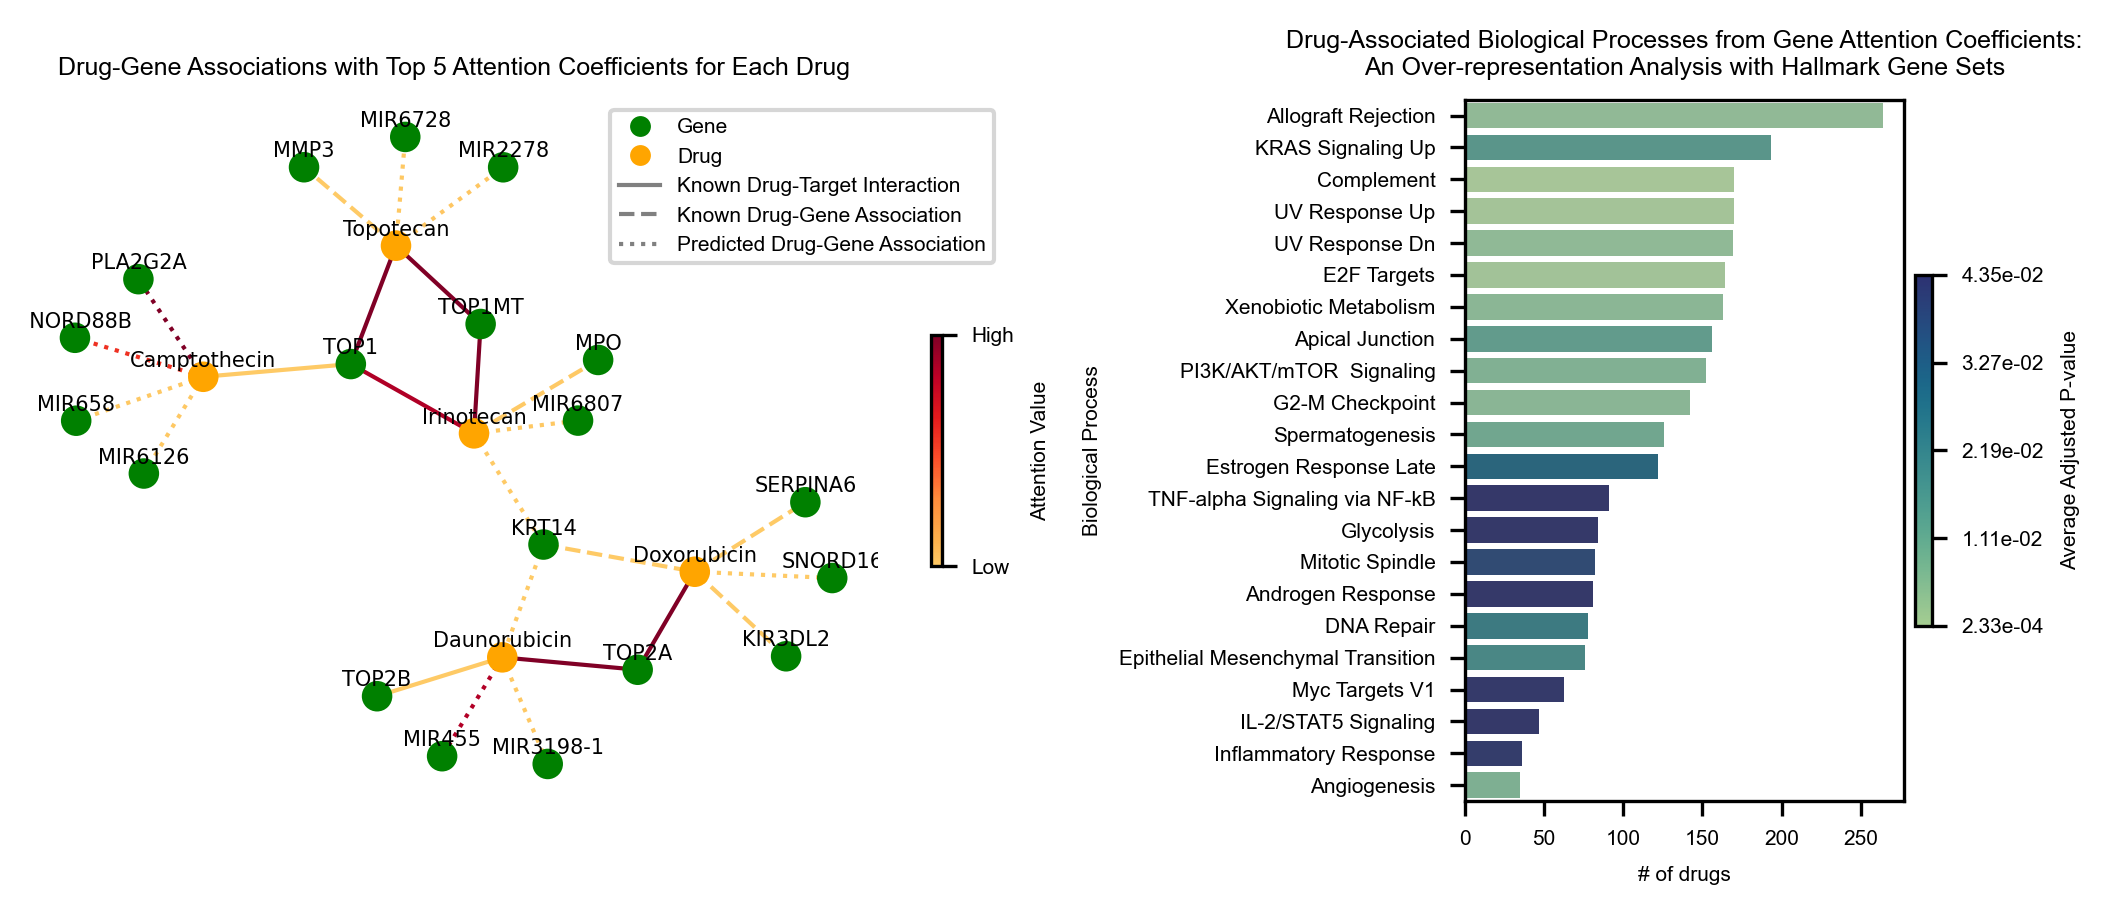

In [3]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import seaborn as sns
import pandas as pd

plt.rcParams["font.family"] = "Arial"
plt.rcParams["pdf.fonttype"] = 42
plt.rcParams['font.size'] = 5

# Create a figure with two subplots side by side, with the left subplot wider
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3), dpi=300, gridspec_kw={'width_ratios': [2, 1]})

# First plot (Network graph)
G = nx.from_pandas_edgelist(df, "genes", "name", ["Attention", "dtis"])
pos_kk = nx.kamada_kawai_layout(G)
genes = set(df["genes"])
drugs = set(df["name"])
node_colors = ["green" if node in genes else "orange" for node in G.nodes()]
label_pos = {key: [value[0], value[1] + 0.05] for key, value in pos_kk.items()}
edges, weights = zip(*nx.get_edge_attributes(G, "Attention").items())
edges_dtis, dtis_values = zip(*nx.get_edge_attributes(G, "dtis").items())

cmap = plt.cm.YlOrRd
cmap_modified = cmap(np.linspace(0.3, 1.0, 256))
cmap_modified = plt.cm.colors.ListedColormap(cmap_modified)
norm = plt.Normalize(0, max(weights))

nx.draw_networkx_nodes(G, pos_kk, node_color=node_colors, node_size=40, ax=ax1)

for edge, weight, dtis in zip(edges, weights, dtis_values):
    try:
        tmp = pubchem.loc[edge[0], edge[1]]
    except:
        tmp = pubchem.loc[edge[1], edge[0]]
    if dtis == 1:
        style = "solid"
    elif tmp > 0:
        style = "--"
    else:
        style = ":"
    nx.draw_networkx_edges(G, pos_kk, edgelist=[edge], width=1, edge_color=cmap_modified(norm(weight)), style=style, ax=ax1)

nx.draw_networkx_labels(G, label_pos, font_size=5, ax=ax1)

sm = plt.cm.ScalarMappable(cmap=cmap_modified, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax1, shrink=0.33, ticks=[])
cbar.set_label("Attention Value")
cbar.set_ticks([norm(0), norm(max(weights))])
cbar.set_ticklabels(["Low", "High"])

green_patch = plt.Line2D([0], [0], marker="o", color="w", markerfacecolor="green", markersize=6, label="Gene")
orange_patch = plt.Line2D([0], [0], marker="o", color="w", markerfacecolor="orange", markersize=6, label="Drug")

ax1.legend(handles=[green_patch, orange_patch,
                    plt.Line2D([0], [0], color="gray", lw=1, ls="-", label="Known Drug-Target Interaction"),
                    plt.Line2D([0], [0], color="gray", lw=1, ls="--", label="Known Drug-Gene Association"),
                    plt.Line2D([0], [0], color="gray", lw=1, ls=":", label="Predicted Drug-Gene Association")],
           loc="upper right", bbox_to_anchor=(1.15, 1))

ax1.axis("off")
ax1.set_title("Drug-Gene Associations with Top 5 Attention Coefficients for Each Drug")

# Second plot (Barplot)
cmap_name = "crest"
cmap = plt.cm.get_cmap(cmap_name)

data = list(gea["Adjusted P-value"])
vmin = np.min(data)
vmax = np.max(data)
norm = plt.Normalize(vmin=vmin, vmax=vmax)
colors = [cmap(norm(value)) for value in data]

sns.barplot(x="drug", y="Term", data=gea.assign(color=colors), palette=colors, dodge=False, ax=ax2)

ax2.tick_params(axis="x")
ax2.tick_params(axis="y")
ax2.set_ylabel("Biological Process")
ax2.set_xlabel("# of drugs")
ax2.set_title("Drug-Associated Biological Processes from Gene Attention Coefficients:\nAn Over-representation Analysis with Hallmark Gene Sets")

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

cbar = plt.colorbar(sm, ax=ax2, shrink=0.5, pad=0.02)
cbar.set_label("Average Adjusted P-value")
cbar.set_ticks(np.linspace(vmin, vmax, num=5))
cbar.set_ticklabels([f"{t:.2e}" for t in np.linspace(vmin, vmax, num=5)])
# cbar.ax.tick_params(labelsize=4)

plt.tight_layout()
plt.savefig("fig4.pdf", bbox_inches='tight', pad_inches=0)
plt.show()